# Correlation Analysis


In [1]:
DATA_PATH = r'..\data\processed\04-final_data_v2.pkl'
# OUTPUT_DATA_PATH =

list_columns = ['Key_languages', 'Databases', 'Platforms', 'Web_frames']
specified_columns = ['EdLevel', 'experanse_years', 'DevType']

## Importing


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# Set the maximum number of rows and columns to display
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# Functions
def encoding_list_col(df):
    # Perform one-hot encoding on list columns

    for column in list_columns:
        # Create a list of unique values from all lists in the column
        unique_values = set(
            value for sublist in df[column] for value in sublist)

        # Create binary features for each unique value
        for value in unique_values:
            df[f"{column}_{value}"] = df[column].apply(
                lambda x: int(value in x))

    # Drop the original list columns
    df = df.drop(columns=list_columns)

    # Rearrange columns to move specified columns to the end

    df = pd.concat([df.drop(columns=specified_columns),
                    df[specified_columns]], axis=1)

    return df

In [4]:
df = pd.read_pickle(DATA_PATH)

In [6]:
encoded_df = encoding_list_col(df)

In [7]:
encoded_df

,Key_languages_MATLAB,Key_languages_Crystal,Key_languages_Go,Key_languages_Erlang,Key_languages_APL,Key_languages_Perl,Key_languages_Ada,Key_languages_PHP,Key_languages_Swift,Key_languages_Dart,...,Web_frames_Django,Web_frames_Solid.js,Web_frames_Elm,Web_frames_Angular,Web_frames_FastAPI,Web_frames_Svelte,Web_frames_jQuery,EdLevel,experanse_years,DevType
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,Bachelor's,9.0,Executive
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Bachelor's,23.0,Back-end Developer
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,Bachelor's,7.0,Front-end Developer
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Bachelor's,4.0,Full-stack Developer
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Some College/University,21.0,Back-end Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67116,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,Bachelor's,8.0,Mobile Developer
67117,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,Master's,11.0,Full-stack Developer
67118,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Bachelor's,22.0,Full-stack Developer
67119,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,Associate,5.0,Front-end Developer


In [28]:
# Extract DevType column for reference
devtype_column = df['DevType']

# Create separate DataFrames for Key_languages and Web_frames
key_languages_df = df.filter(regex='^DevType|Key_languages_', axis=1)
web_frames_df = df.filter(regex='^DevType|Web_frames_', axis=1)
Databases_df = df.filter(regex='^DevType|Databases_', axis=1)
Platforms_df = df.filter(regex='^DevType|Platforms_', axis=1)

key_languages_df = key_languages_df.groupby('DevType').corr()
web_frames_df = web_frames_df.groupby('DevType').corr()

Databases_df = Databases_df.groupby('DevType').corr()
Platforms_df = Platforms_df.groupby('DevType').corr()

In [38]:
key_languages_df.reset_index()

,DevType,level_1,Key_languages_MATLAB,Key_languages_Crystal,Key_languages_Go,Key_languages_Erlang,Key_languages_APL,Key_languages_Perl,Key_languages_Ada,Key_languages_PHP,...,Key_languages_Flow,Key_languages_Java,Key_languages_Bash/Shell (all shells),Key_languages_Clojure,Key_languages_C,Key_languages_Fortran,Key_languages_TypeScript,Key_languages_Visual Basic (.Net),Key_languages_Ruby,Key_languages_HTML/CSS
0,Academic Researcher,Key_languages_MATLAB,1.000000,0.005905,0.026897,-0.008666,0.039208,0.058193,0.015680,0.097345,...,0.063191,0.064953,0.042399,0.004374,0.115072,0.141941,-0.038124,0.094706,0.044671,0.041016
1,Academic Researcher,Key_languages_Crystal,0.005905,1.000000,0.064557,0.268422,0.467109,0.158100,0.170105,0.121909,...,0.382139,0.083054,0.045179,0.331435,0.040442,0.078064,0.093482,0.130675,0.158100,0.110957
2,Academic Researcher,Key_languages_Go,0.026897,0.064557,1.000000,0.090219,0.106901,0.121352,0.028910,0.112006,...,0.093449,0.137941,0.117035,0.086087,0.142188,0.022204,0.223929,0.115552,0.121352,0.127489
3,Academic Researcher,Key_languages_Erlang,-0.008666,0.268422,0.090219,1.000000,0.211379,0.119679,0.130577,0.062324,...,0.235796,0.088413,0.068330,0.194816,0.068124,0.020297,0.068517,0.068985,0.082922,0.033932
4,Academic Researcher,Key_languages_APL,0.039208,0.467109,0.106901,0.211379,1.000000,0.169612,0.313697,0.066851,...,0.405711,0.066077,0.079470,0.279758,0.027898,0.086231,0.133000,0.216607,0.169612,0.008718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,System Administrator,Key_languages_Fortran,0.256260,0.258662,0.075904,0.282448,0.366830,0.096818,0.237515,0.084275,...,0.439655,0.065911,0.105409,0.319314,0.227070,1.000000,-0.005161,0.132869,0.109562,0.056292
1608,System Administrator,Key_languages_TypeScript,0.071659,0.041255,0.092156,0.067176,0.143428,-0.042157,0.027537,0.050957,...,0.094133,0.079321,0.002772,0.112671,0.024046,-0.005161,1.000000,0.058649,0.117772,0.250004
1609,System Administrator,Key_languages_Visual Basic (.Net),0.073938,0.075703,-0.021474,0.053531,0.132521,-0.006355,0.063744,0.120325,...,0.168297,0.089830,-0.011635,0.108273,0.121996,0.132869,0.058649,1.000000,0.026911,0.127645
1610,System Administrator,Key_languages_Ruby,0.115336,0.246051,0.059166,0.234315,0.113161,0.155281,0.081959,-0.008833,...,0.146897,0.060222,0.126955,0.134952,0.094554,0.109562,0.117772,0.026911,1.000000,0.046114


<Figure size 3000x1500 with 0 Axes>

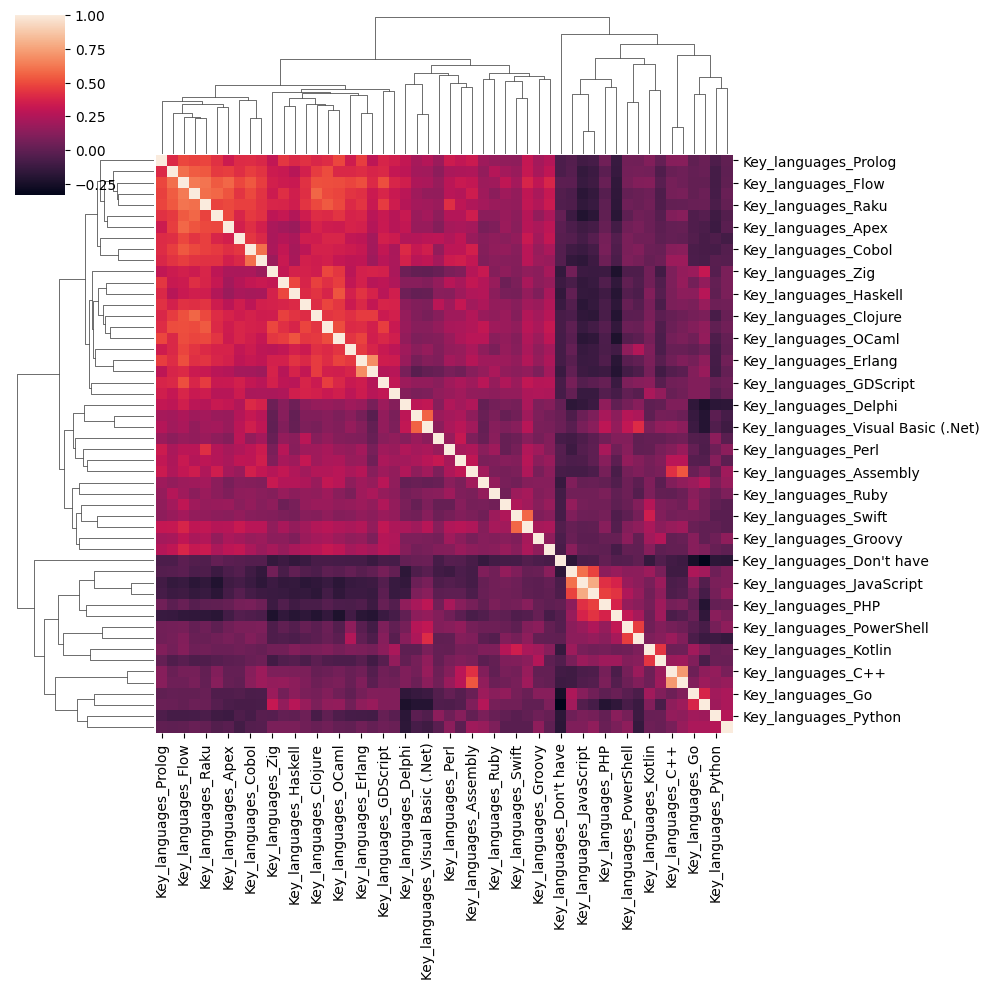

In [39]:
plt.figure(figsize=(30, 15))
sns.clustermap(key_languages_df.corr())

<Axes: >

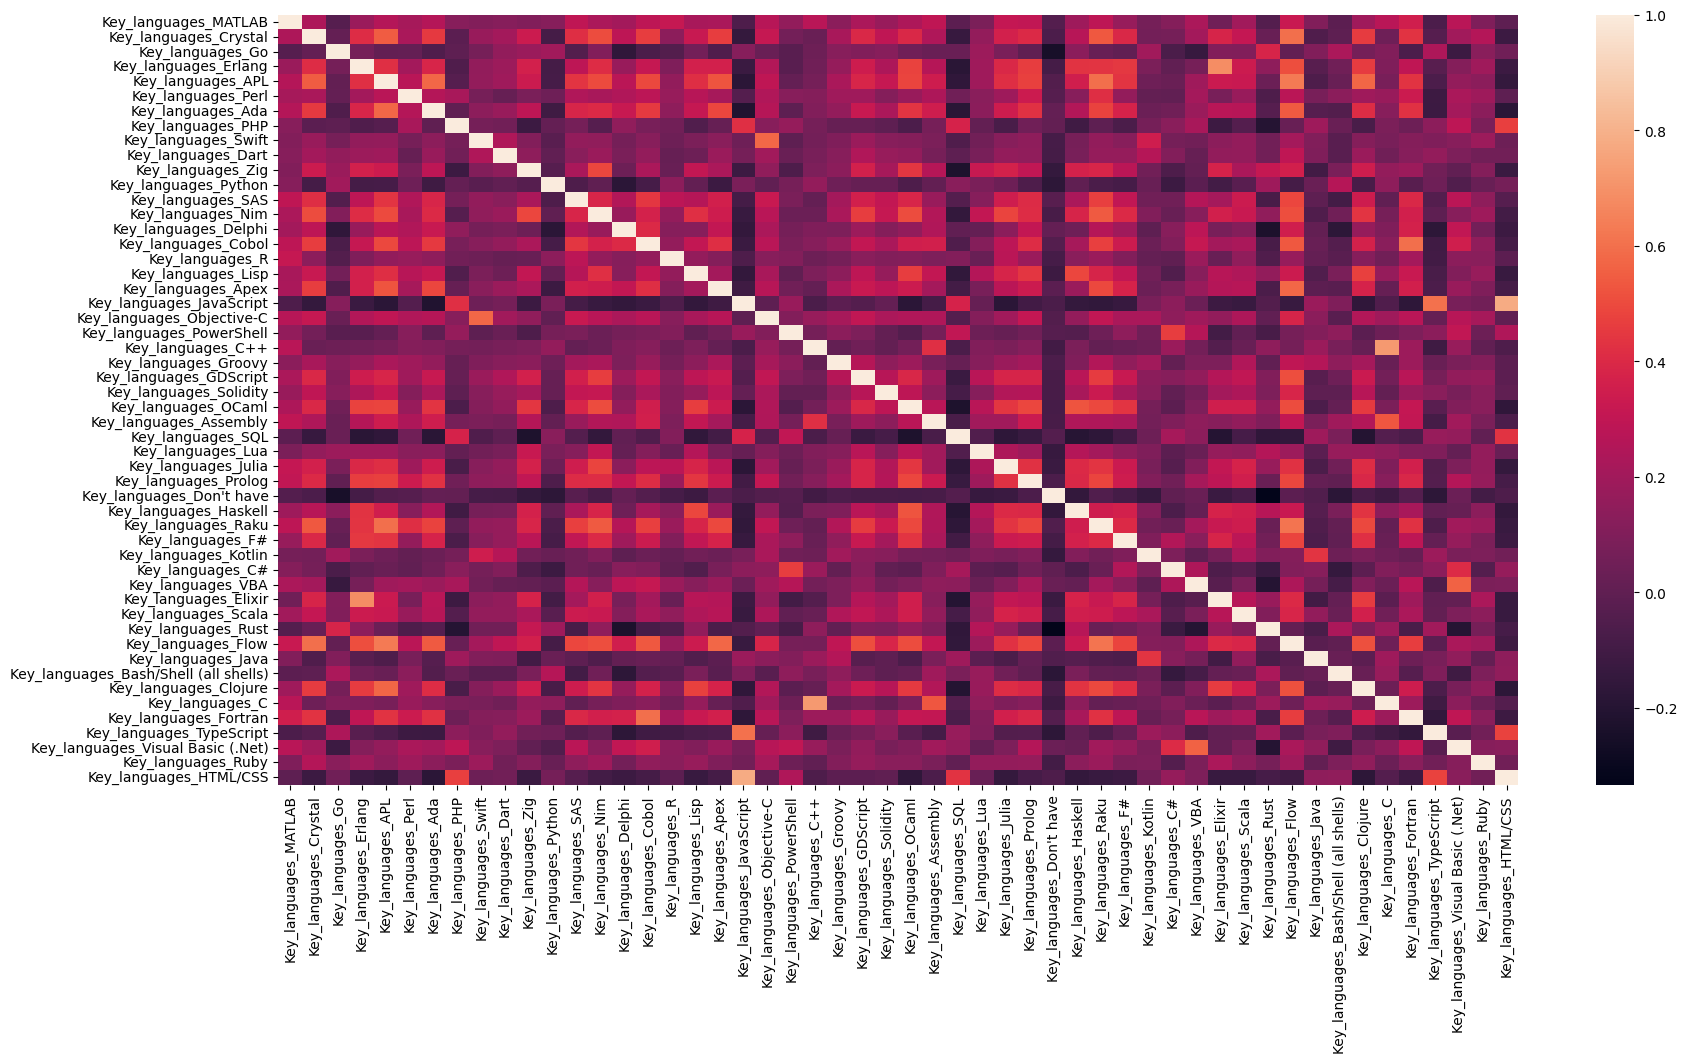

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(key_languages_df.corr())

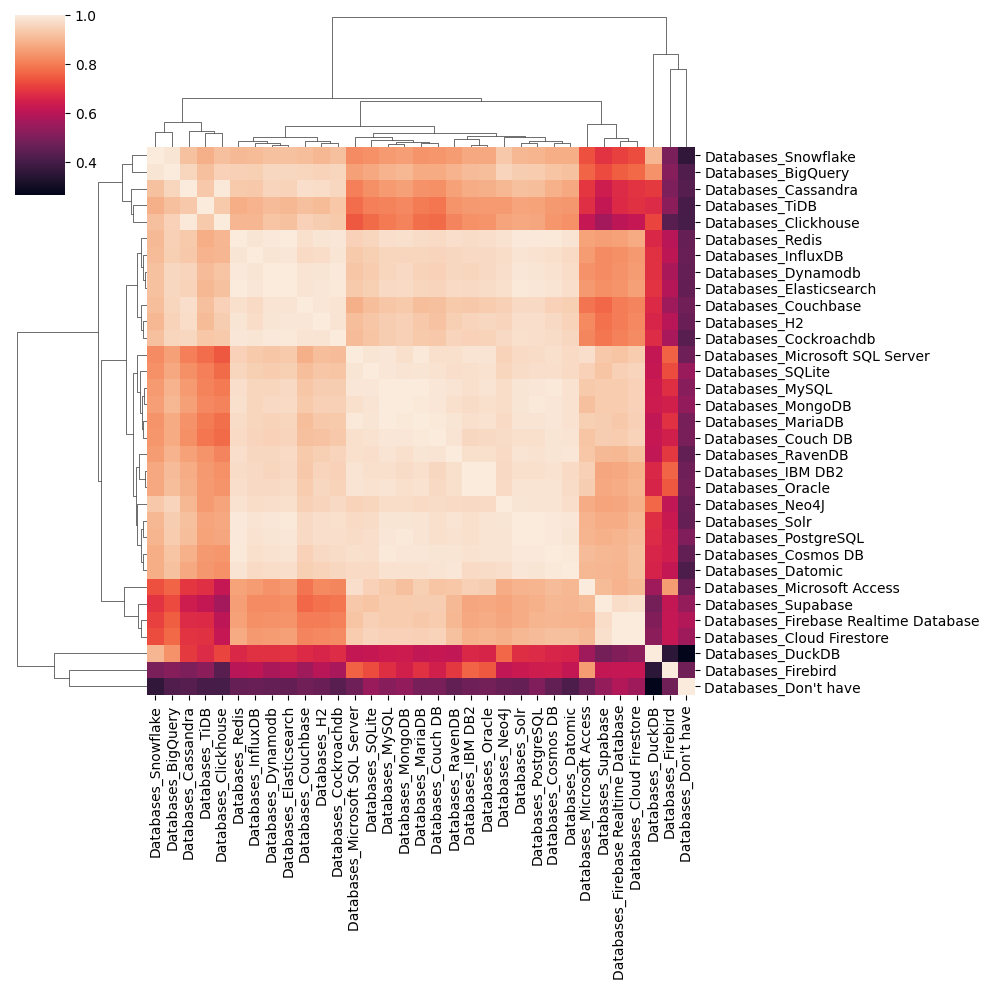

In [21]:
sns.clustermap(Databases_df.corr())

<Axes: >

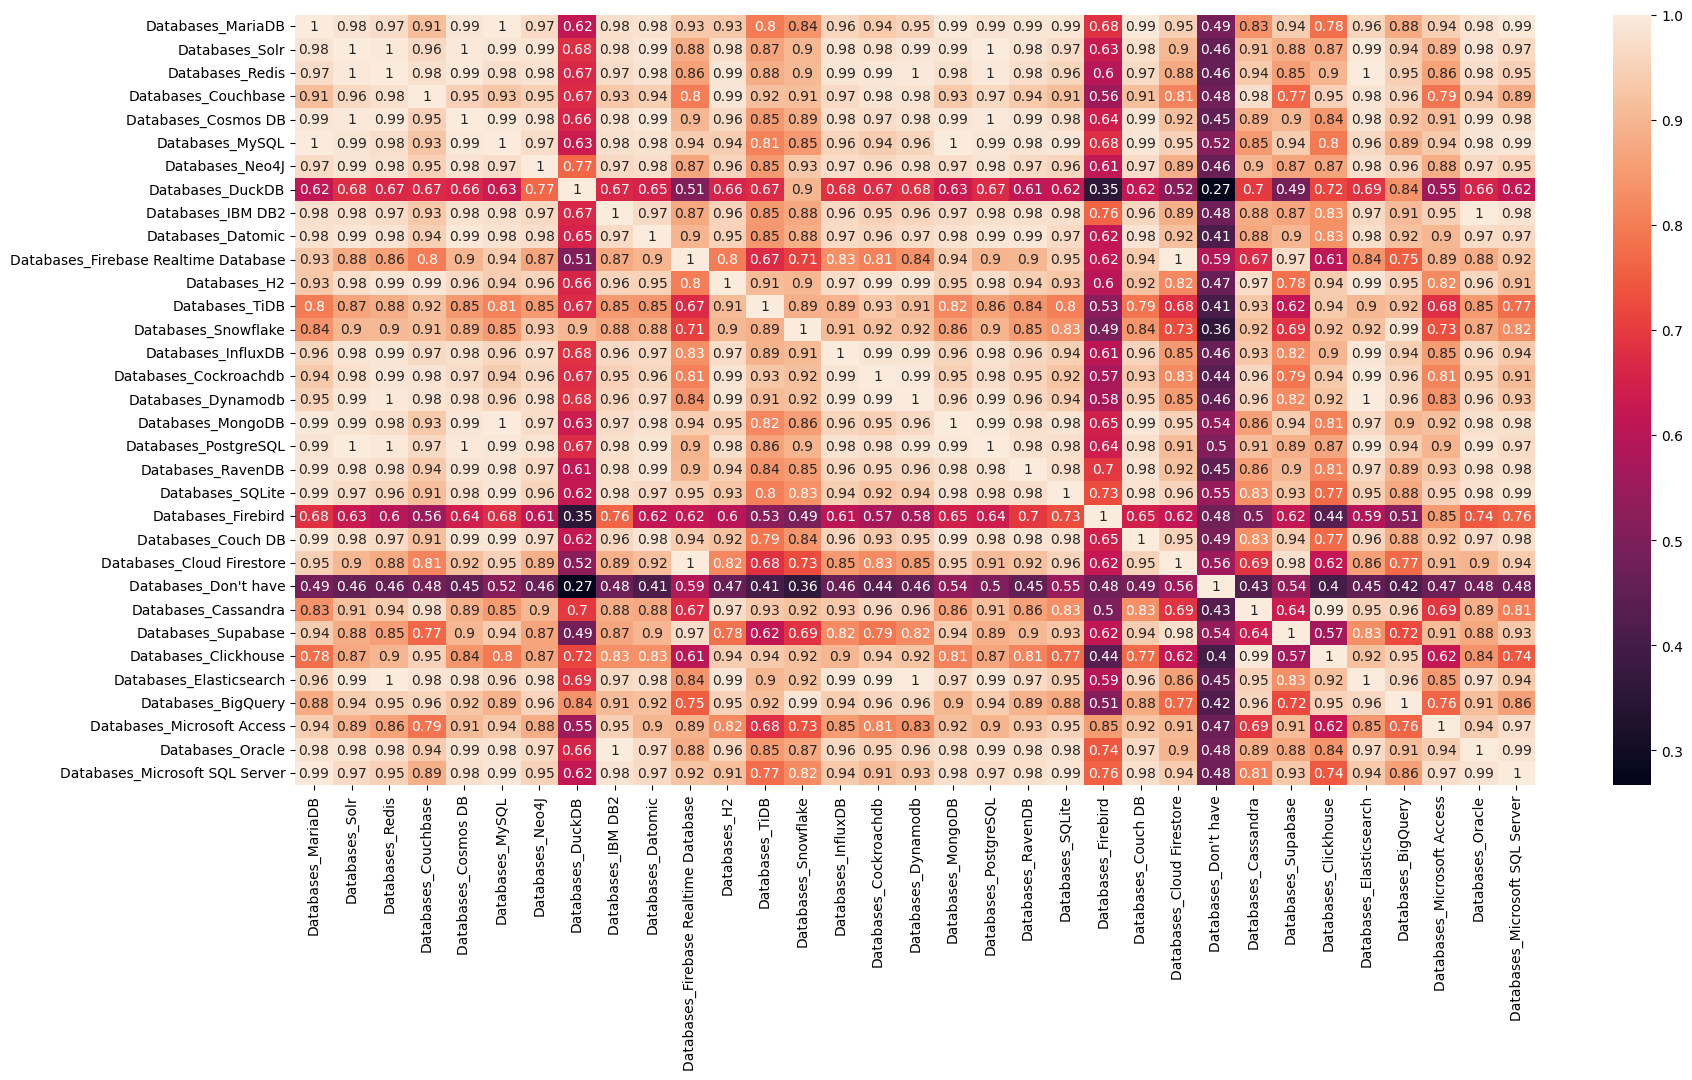

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(Databases_df.corr(), annot=True)